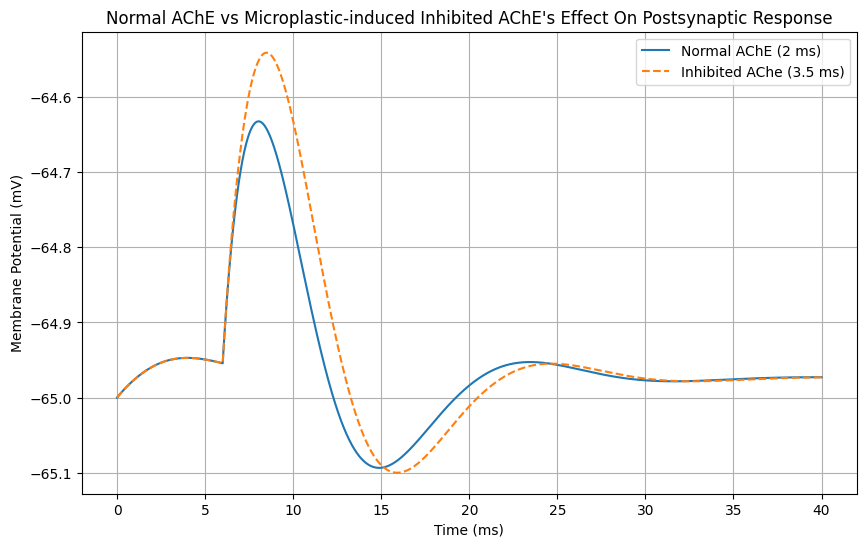

In [10]:
from neuron import h, gui
import matplotlib.pyplot as plt
# the default units are ms for time, mV for voltages.

def simulation(syn_lasts):
    
    soma = h.Section(name='soma')
    soma.insert('hh') # using the hh allows me to build the simulation on top of the Hodgkin Huxley model.

    syn = h.ExpSyn(soma(0.5)) # this NEURON "mechanism" is for fast ligand-gated synaptic input activated by transmitters. using this, i simulate an exponential decay of synaptic conductance. soma(0.5) simplifies things by assuming the synapse is located at the center of the soma compartment.
    syn.tau = syn_lasts # this defines hww long the synaptic conductance lasts. if the value is large, then the decay is slow and so the depolarization is longer.
    syn.e = 0  # this defines the reversal potential of the synapse. so, when the resting membrane potential is below 0mV, there's an inward flow of Na ions.

    stim = h.NetStim() # using NetStim mechanism allows me to simulate a presynaptic neuron firing an action potential. this is how the ACh gets released into the synapse.
    stim.number = 1 # for simplicity, i am only allowing one spike to generate.
    stim.start = 5  # at 5 ms, the presynaptic neuron fires and releases ACh and activates the postsynaptic receptor to catch the neuron from the cleft. apparently, delaying the start allows the neuron to reach a steady-state first.

    nc = h.NetCon(stim, syn) # through NetCon I am able to connec the pre with the post. So, when the NetStim works and the neuron fires, through the connection made by NetCon, ExpSyn works and ACh is bind to the receptor of the postsynaptic neuron.
    nc.weight[0] = 0.01  # the synaptic weight sets the strength of the synaptic connection. used this because it's standard in NEURON examples and the value is small but enough to see the response well.

    v = h.Vector().record(soma(0.5)._ref_v) # these are just some general code to write to plot the voltage vs time graphs
    t = h.Vector().record(h._ref_t)

    # Run simulation
    h.finitialize(-65) # in NEURON examples, they set the -65 mV as the resting potential, so i am using the same.
    h.continuerun(40) # runs the simulation for 40 ms, which I think is enough to see the response.

    return t.to_python(), v.to_python()

# Run both simulations
t_normal, v_normal = simulation(syn_lasts=2.0)        # here, AChE behaves normally wherein it breaks down ACh in 2 ms.
t_inhibited, v_inhibited = simulation(syn_lasts=3.5)  # here, AChE's activity is inhibited due to the presence of microplastic, and so the breakdown of ACh happens with a delay. This causes the ACh to linger longer, prolonging receptor activation and producing a longer depolarizing current.

# to visualize, I am plotting using matplotlib.
plt.figure(figsize=(10, 6))
plt.plot(t_normal, v_normal, label="Normal AChE (2 ms)")
plt.plot(t_inhibited, v_inhibited, "--", label="Inhibited AChe (3.5 ms)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Normal AChE vs Microplastic-induced Inhibited AChE's Effect On Postsynaptic Response")
plt.legend()
plt.grid(True)
plt.show()
